<a href="https://colab.research.google.com/github/RuiyZheng/Ruiyi-Zheng-Final-Project-Codes_with-README/blob/main/Ruiyi_Zheng_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning:

* Removing the column fileorder because of the repetitive contents with the parkname and and most rows are left blank.
* Removing the overlapped blank contents between the column maintain, contractor,Name 2, Name 3, MaintainedByParks,Installation, X and Y.
* Removing blank rows in Borough column.
* Correcting 1 row in Queens borough marked as Q, 1 in Manhattan marked as M.
* Removing 1 blank content of the parkprop column.
* Removing 1 row marked as Y Y in the maintained by parks column.
* Removing blank MaintainedByParks rows.
* Removing blank Parkname rows.
* Removing Inscribing Columns since the left are all blank.
* Removing blank rows in Material Columns.
* Removing blank categories.
* Removing the blank Dedicated rows.
* Removing the blank Dimension rows.
* Removing the blank Sponsor rows.


I found tha this dataset quite fragmental with only a few overlaps. Each column has too many rows which makes the graph difficult to read. Therfore, in terms of the data cleaning, my intention is to minimize the row numbers and find the connections between each data.


**Dependecies Files**

Google Drive:https://drive.google.com/drive/u/0/folders/19ulGMlbVBrK_3jUS8ltbDHPMYVhYjKd9

In [1]:
import pandas as pd

file_path = '/content/NYC-Parks-Monuments-csv_final_final.csv'
park_monument = pd.read_csv(file_path)
park_monument.head()

,name,number,parkprop,borough,parkname,parknumber,commboard,council,Location,extant,...,contractor,Name2,Name3,MaintainedByParks,Installation,Rededication,Cost,Categories,X,Y
0,Netherland Monument,1092,Y,Manhattan,Battery Park,M005,1,1,Northeast entrance near intersection of State ...,Y,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,Colonial,980204.185245,195909.091499
1,Norwegian Veterans Monument,1123,Y,Manhattan,Battery Park,M005,1,1,Northwest of Castle Clinton,Y,...,"$6,400 contributed by Norwegian war veterans t...",NaN,NaN,Y,NaN,NaN,NaN,"World War II, War Memorial",979444.718260,195681.159540
2,Dante Alighieri,363,Y,Manhattan,Dante Park,M020,7,6,Broadway & 63rd Street,Y,...,NaN,NaN,NaN,Y,NaN,09/14/2021,NaN,"Sculpture, Writer",989080.567427,220451.235984
3,Coast Guard Memorial,277,Y,Manhattan,Battery Park,M005,1,1,Not presently accessible; under construction.,Y,...,NaN,NaN,NaN,Y,NaN,10/04/2021,NaN,"Sculpture, Soldier, War Memorial, World War II",980384.223599,194763.973383
4,Washington Kill Von Kull Plaque,1678,Y,Staten Island,Faber Park,R008,1,49,FABER PARK POOL ENTRANCE; Richmond Terrace bet...,Y,...,Masterworks Plaques,NaN,NaN,Y,NaN,NaN,NaN,US President,946639.815366,172668.645854


In [ ]:
park_grouped = park_monument.groupby('name')['descrip']


monument_dict = {}

for item in park_grouped:
    category = item[0]
    name = item[1].unique().tolist()
    counts = item[1].value_counts().tolist()
    monument_dict[category] = dict(zip(name, counts))

for key, value in monument_dict.items():
  print(key, value)

Abraham Lincoln {'Standing figure (over life-size) with integral plinth on pedestal': 1, 'Standing figure (over life-size) on integral plinth on pedestal with wreaths and insignia of US Army and Navy at front and rear, and two eagles, one proper left and one proper right': 1}
Admiral David Glasgow Farragut {'Standing figure (over life-size) with integral plinth, on pedestal with extended exedra wings; pedestal has bas-relief of sword in ocean waves; each wing  has a life-size bas-relief of seated female figure': 1}
Albert Bertel Thorvaldsen {'Portrait statue on pedestal with medallions': 1}
Alexander Hamilton {'Standing figure (over life-size) on intergral plinth, on pedestal': 1}
Alexander Lyman Holley {'Bust on a high central stele joined by screens to shorter side steles at right and left, the whole on a plinth resting on a semi-circular step': 1}
Alexander von Humboldt {'Bust (over life-size) on pedestal': 1}
Alice in Wonderland {'Group (heroic scale)': 1}
Antonin Dvorak {'Standing

In [ ]:
#writting json file
import json

monument_path = 'List of the Correlating Park Monument and the Description.json'

with open(monument_path, 'w') as json_object:
  json.dump(monument_dict, json_object)
  print("file written")

file written


In [ ]:
import json
json_path = '/content/List of the Correlating Park Monument and the Description.json'

with open(json_path, 'r') as json_obj:
  tree_count_data = json.load(json_obj)

tree_count_data

{'Abraham Lincoln': {'Standing figure (over life-size) with integral plinth on pedestal': 1,
  'Standing figure (over life-size) on integral plinth on pedestal with wreaths and insignia of US Army and Navy at front and rear, and two eagles, one proper left and one proper right': 1},
 'Admiral David Glasgow Farragut': {'Standing figure (over life-size) with integral plinth, on pedestal with extended exedra wings; pedestal has bas-relief of sword in ocean waves; each wing  has a life-size bas-relief of seated female figure': 1},
 'Albert Bertel Thorvaldsen': {'Portrait statue on pedestal with medallions': 1},
 'Alexander Hamilton': {'Standing figure (over life-size) on intergral plinth, on pedestal': 1},
 'Alexander Lyman Holley': {'Bust on a high central stele joined by screens to shorter side steles at right and left, the whole on a plinth resting on a semi-circular step': 1},
 'Alexander von Humboldt': {'Bust (over life-size) on pedestal': 1},
 'Alice in Wonderland': {'Group (heroic s

In [ ]:
#getting means
average_x_coordinates = park_monument.X
print(average_x_coordinates.describe())

count    1.010000e+02
mean     9.911021e+05
std      1.023993e+04
min      9.466398e+05
25%      9.884620e+05
50%      9.917095e+05
75%      9.930519e+05
max      1.042873e+06
Name: X, dtype: float64


In [ ]:
#getting skew
average_x_coordinates.skew()

0.5775173901128916

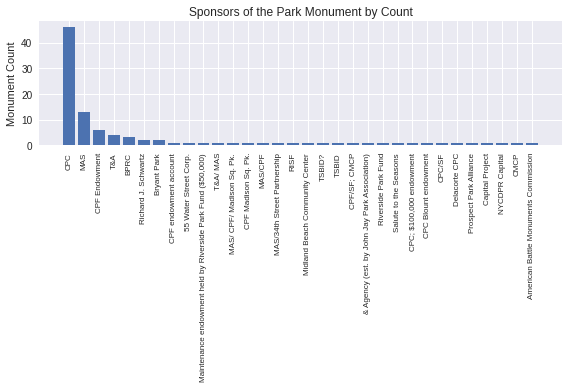

<Figure size 576x396 with 0 Axes>

In [ ]:
#Graph 1
new_data = park_monument.sponsor.value_counts()
sponsor_list = []
counts_list = []

for item in new_data.iteritems():
  species = item[0]
  sponsor_list.append(species)
  count = item[1]
  counts_list.append(count)

from matplotlib import pyplot as plt

plt.style.use('seaborn')
plt.bar(sponsor_list, counts_list)
plt.title("Sponsors of the Park Monument by Count")
plt.ylabel("Monument Count")
plt.xticks(rotation=90, size=8)
plt.tight_layout()
plt.show()
plt.savefig('Sponsors of the Park Monument by Count.png', height=800, width=1000, dpi=300)

**Analysis**

The bar graph above shows the first three places of the sponsors to the park monument, which are CPC, MAS and CPF Endowment. According to the graph, the organization who sponsor the most Park monuments and the numbers of the sponsoring monuments could be read cleary. The graph also shows the differences of the numbers of sponsored monuments among each organization.

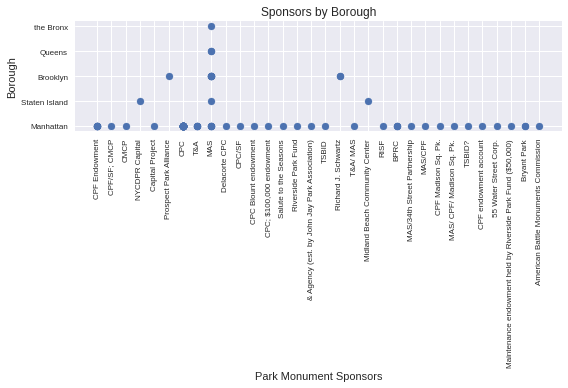

<Figure size 576x396 with 0 Axes>

In [ ]:
#Graph 2
from matplotlib import pyplot as plt_monument

x_vals = park_monument.sponsor
y_vals = park_monument.borough

plt_monument.style.use('seaborn')
plt_monument.scatter(x_vals, y_vals)
plt_monument.title("Sponsors by Borough")
plt_monument.xlabel("Park Monument Sponsors")
plt_monument.ylabel("Borough")
plt_monument.xticks(rotation=90, size=8)
plt_monument.yticks(size=8)
plt_monument.tight_layout() #adds spacing and padding for legibility
plt_monument.show()
plt_monument.savefig('Sponsors by Borough.png', height=800, width=1000, dpi=300)

**Analysis**

The graph above show CPC only sponsors the monuments in Manhattan, whereas the monuments that MAS sponsors across all five borough of NYC.In comparison to the bar graph above, it is quite intersting to see even though CPC is the organization who sponsors the most numbers of monument, their sponsoring only focuses on Manhattan. Though Mas sponsors the second most monuments, their sponsoring distributes across all five borough of NYC.

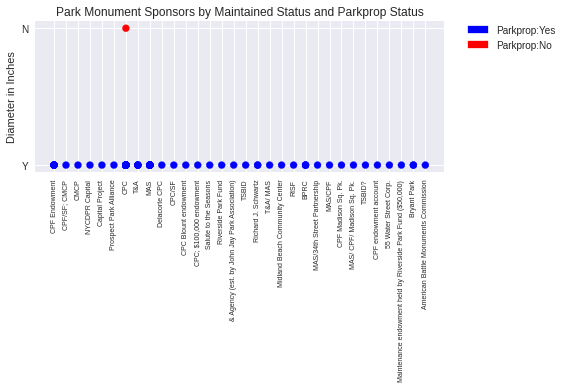

<Figure size 576x396 with 0 Axes>

In [ ]:
#Graph 3
# color mapping using technique from https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
parkprop_YN = park_monument.parkprop.unique()
parkprop_YN_color = ('blue', 'red')
color_map = dict(zip(parkprop_YN, parkprop_YN_color))


#use advanced handles: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
#position plot using: https://matplotlib.org/3.1.1/gallery/userdemo/simple_legend01.html#sphx-glr-gallery-userdemo-simple-legend01-py
import matplotlib.patches as mpatches
plt.scatter(park_monument.sponsor, park_monument.MaintainedByParks, c=park_monument['parkprop'].map(color_map))
plt.xticks(rotation=90, size=7)

#create handlers
Y = mpatches.Patch(color='blue', label='Parkprop:Yes')
N = mpatches.Patch(color='red', label='Parkprop:No')


#position plot
plt.legend(handles=[Y,N], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Park Monument Sponsors by Maintained Status and Parkprop Status")
plt.ylabel("Diameter in Inches")
plt.tight_layout()
plt.show()
plt.savefig('Park Monument Sponsors by Maintained Status and Parkprop Status.png', height=800, width=1000, dpi=300)

**Analysis**

The graph above shows that the monument which is not on the parkland and the monument without the maintence from the park is the same one. Besides, the graph also shows that the monuments which are spnsored by organizations are more likely to be maintained by parks, except for the monument which are not on the parkland.

In [ ]:
new_data = park_monument.sponsor.value_counts()
parkname_list = []
materials_list = []

for item in new_data.iteritems():
  parkname = item[0]
  parkname_list.append(parkname)
  materials_counts = item[1]
  materials_list.append(materials_counts)

from matplotlib import pyplot as plt

plt.style.use('seaborn')
plt.bar(parkname_list, materials_list)
plt.title("Sponsors of the Park Monument by Count")
plt.ylabel("Monument Count")
plt.xticks(rotation=90, size=8)
plt.tight_layout()
plt.show()
plt_monument.savefig('Sponsors of the Park Monument by Count.png', height=800, width=1000, dpi=300)

**Difficulties**

The difficulties that I encountered is to find the connections between the data and visulize the connects; since the data are relatively fragmental and the connections are less obvious. There are too many rows, which would make one of the axis too long and the graph hard to read. I went back and forth from data cleaning to graphing several times. 

**Expanding work for the future**

I would either calculate the volume of each monument and modify the rows in dimension columns, so that I could get the average dimensions of the NYC park monuments. Or I would divide the information in dimension columns into four different columns and get the average for each column.